Research question:

- Playoffs with home court advantage vs playoffs in the bubble
    - scoring
    - assists
    - are low seeded teams more likely to succeed in bubble because of no home court advantage
- Regular season with fans vs after bubble started without fans regular season points scored
- More fouls with fans vs without?


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## load data
bubble_reg_trad = pd.read_excel("nbadata2950.xlsx", sheet_name="bubbleregtrad")
bubble_reg_adv= pd.read_excel("nbadata2950.xlsx", sheet_name="bubbleregadv")



In [16]:
bubble_reg=pd.merge(bubble_reg_trad, bubble_reg_adv, how='inner', on='TEAM')

bubble_reg=bubble_reg.drop(columns=['GP_y', 'W_y', 'L_y', 'Unnamed: 0_x'])
bubble_reg=bubble_reg.rename(columns={"GP_x":"GP", "W_x": "W", "L_x": "L", "MIN_x": "MIN"})
bubble_reg

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,Washington Wizards,8,1,7,0.125,48.0,104.9,38.5,90.4,42.6,...,1.50,16.1,27.7,74.7,49.8,14.7,47.9,52.1,102.25,43.6
1,Utah Jazz,8,3,5,0.375,49.3,113.4,39.6,89.6,44.2,...,1.45,17.2,28.9,74.3,50.6,16.3,52.6,56.8,100.69,47.2
2,Toronto Raptors,8,7,1,0.875,48.0,110.9,37.6,83.3,45.2,...,1.34,17.3,22.8,76.9,51.0,17.2,53.8,58.1,103.69,52.5
3,San Antonio Spurs,8,5,3,0.625,48.0,121.1,43.3,89.0,48.6,...,1.68,17.8,27.8,75.1,52.1,14.4,54.8,59.6,105.50,52.9
4,Sacramento Kings,8,3,5,0.375,48.6,119.0,45.0,92.8,48.5,...,1.79,18.6,27.5,74.2,50.4,14.4,55.7,58.5,103.77,48.3
5,Portland Trail Blazers,8,6,2,0.750,48.6,126.0,44.9,93.9,47.8,...,2.18,17.0,29.4,73.4,50.7,10.7,56.0,60.1,101.37,51.0
6,Phoenix Suns,8,8,0,1.000,48.0,122.3,44.5,90.0,49.4,...,2.28,19.6,25.7,78.1,53.1,11.9,56.7,61.2,101.63,57.0
7,Philadelphia 76ers,8,4,4,0.500,48.0,120.1,43.6,89.5,48.7,...,1.77,17.8,30.6,74.7,52.5,14.1,56.1,59.7,101.31,51.0
8,Orlando Magic,8,3,5,0.375,48.6,114.6,40.1,86.9,46.2,...,1.61,17.0,25.8,75.7,50.8,14.3,53.2,57.8,101.31,47.9
9,Oklahoma City Thunder,8,4,4,0.500,49.3,107.6,37.6,88.6,42.5,...,1.30,14.8,25.6,73.2,49.1,15.1,49.8,54.1,101.06,47.2


In [6]:
#print(bubble_reg)

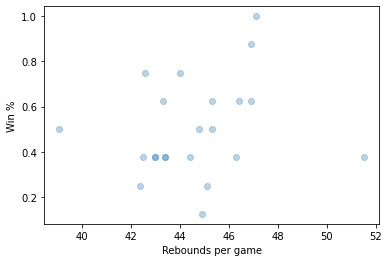

In [19]:
plt.scatter(bubble_reg["REB"], bubble_reg["WIN%"], alpha=.3)
plt.xlabel('Rebounds per game')
plt.ylabel('Win %')
plt.show()


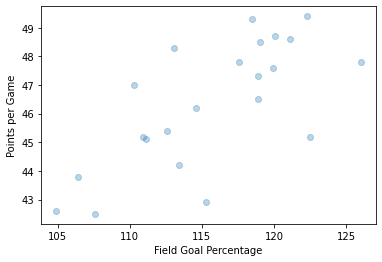

In [18]:
plt.scatter(bubble_reg["PTS"], bubble_reg["FG%"], alpha=.3)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Points per Game')
plt.show()